### Data Import

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/JOSH/Desktop/60 Days Challenge/Project 4/global_ecommerce_sales.csv",
                parse_dates=['Transaction Date'])

### Data Info and Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction Date  500000 non-null  datetime64[ns]
 1   Customer ID       500000 non-null  object        
 2   Region            500000 non-null  object        
 3   Product ID        500000 non-null  object        
 4   Category          500000 non-null  object        
 5   Price             500000 non-null  float64       
 6   Quantity          500000 non-null  int64         
 7   Discount (%)      500000 non-null  float64       
 8   Total Revenue     500000 non-null  float64       
 9   Payment Method    500000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 38.1+ MB


In [6]:
df.describe()

,Price,Quantity,Discount (%),Total Revenue
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,502.732868,3.001728,14.973566,1282.473695
std,286.922294,1.414259,8.667876,1022.572960
min,5.000000,1.000000,0.000000,3.580000
25%,254.980000,2.000000,7.450000,469.740000
50%,502.300000,3.000000,14.980000,993.315000
75%,751.260000,4.000000,22.470000,1890.542500
max,999.990000,5.000000,30.000000,4988.910000


### Checking for Missing Values

In [7]:
print("Missing values count:")
print(df.isnull().sum())

Missing values count:
Transaction Date    0
Customer ID         0
Region              0
Product ID          0
Category            0
Price               0
Quantity            0
Discount (%)        0
Total Revenue       0
Payment Method      0
dtype: int64


### Confrming Column Data Types

In [8]:
print("\nColumn data types:")
print(df.dtypes)


Column data types:
Transaction Date    datetime64[ns]
Customer ID                 object
Region                      object
Product ID                  object
Category                    object
Price                      float64
Quantity                     int64
Discount (%)               float64
Total Revenue              float64
Payment Method              object
dtype: object


### Detecting Outliers

In [20]:
# Function to detect and flag outliers
def flag_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_flags = np.where((series < lower_bound) | (series > upper_bound), 1, 0)
    return outlier_flags

In [22]:
# Flag otutliers in quantiy, price, tota_revenue
for col in ['Quantity', 'Price', 'Total Revenue']:
    df[f'{col}_outlier'] = flag_outliers(df[col])
    
print("\nOutliers:")
print("Outliers in Quantity:")
print(df[df['Quantity_outlier'] == 1])
print("\nOutliers in Price:")
print(df[df['Price_outlier'] == 1])
print("\nOutliers in Total Revenue:")
print(df[df['Total Revenue_outlier'] == 1])


Outliers:
Outliers in Quantity:
Empty DataFrame
Columns: [Transaction Date, Customer ID, Region, Product ID, Category, Price, Quantity, Discount (%), Total Revenue, Payment Method, Quantity_outlier, Price_outlier, Total Revenue_outlier]
Index: []

Outliers in Price:
Empty DataFrame
Columns: [Transaction Date, Customer ID, Region, Product ID, Category, Price, Quantity, Discount (%), Total Revenue, Payment Method, Quantity_outlier, Price_outlier, Total Revenue_outlier]
Index: []

Outliers in Total Revenue:
       Transaction Date Customer ID         Region    Product ID  \
19           2022-11-09  CUST_13923      Australia  Product_4949   
149          2022-04-15  CUST_54133  South America  Product_7213   
275          2023-09-26  CUST_91585         Africa  Product_2701   
289          2023-02-18  CUST_61249  South America  Product_7914   
334          2023-10-21  CUST_32126      Australia  Product_2237   
...                 ...         ...            ...           ...   
499459       

### Creating Time_Based Features

In [24]:
df['year'] = df['Transaction Date'].dt.year
df['month'] = df['Transaction Date'].dt.month
df['day'] = df['Transaction Date'].dt.day
df['day_of_week'] = df['Transaction Date'].dt.day_name()

### Basic Exploratory Stats

#### Unique Count of Customers

In [26]:
df['Customer ID'].nunique()

98348

#### Unique Count of Products

In [27]:
df['Product ID'].nunique()

10000

#### Descriptive Stats

In [29]:
df[['Price', 'Quantity', 'Discount (%)', 'Total Revenue']].describe()

,Price,Quantity,Discount (%),Total Revenue
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,502.732868,3.001728,14.973566,1282.473695
std,286.922294,1.414259,8.667876,1022.572960
min,5.000000,1.000000,0.000000,3.580000
25%,254.980000,2.000000,7.450000,469.740000
50%,502.300000,3.000000,14.980000,993.315000
75%,751.260000,4.000000,22.470000,1890.542500
max,999.990000,5.000000,30.000000,4988.910000


## Revenue, Time Series & Trend Analysis

#### 1. Aggregate Revenue and Quantity by Month

In [30]:
monthly_summary = df.groupby(['year', 'month']).agg({'Total Revenue': 'sum', 'Quantity': 'sum'}).reset_index()

monthly_summary['date'] = pd.to_datetime(monthly_summary[['year', 'month']].assign(day=1))
monthly_summary.sort_values('date', inplace=True)

#### 2. Calculate AOV (Average Order Value)

In [35]:
monthly_summary['AOV'] = monthly_summary['Total Revenue'] / monthly_summary['Quantity']


#### 3. Visualize Monthly Revenue Trend

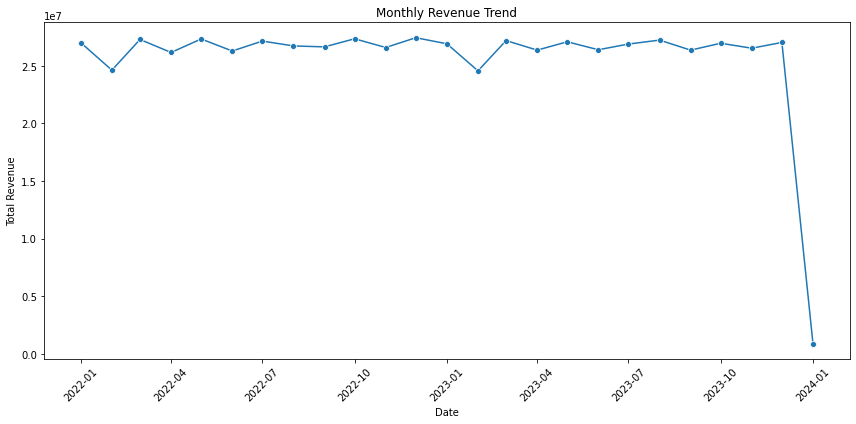

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 6))
sns.lineplot(x='date', y='Total Revenue', data=monthly_summary, marker='o')
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Revenue')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4. Visualize AOV and Quantity Trends

##### 4a. AOV Trend

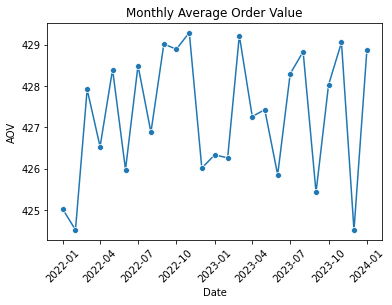

In [37]:
sns.lineplot(x='date', y='AOV', data=monthly_summary, marker='o')
plt.title('Monthly Average Order Value')
plt.ylabel('AOV')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

##### 4b. Quantity Trend

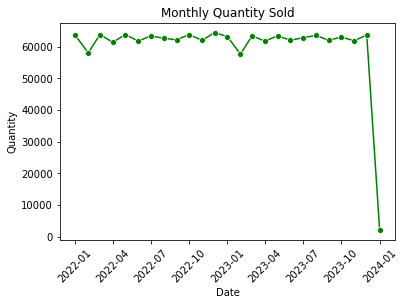

In [45]:
sns.lineplot(x='date', y='Quantity', data=monthly_summary, marker='o', color='green')
plt.title('Monthly Quantity Sold')
plt.ylabel('Quantity')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

#### 5. Revenue by Day of the Week

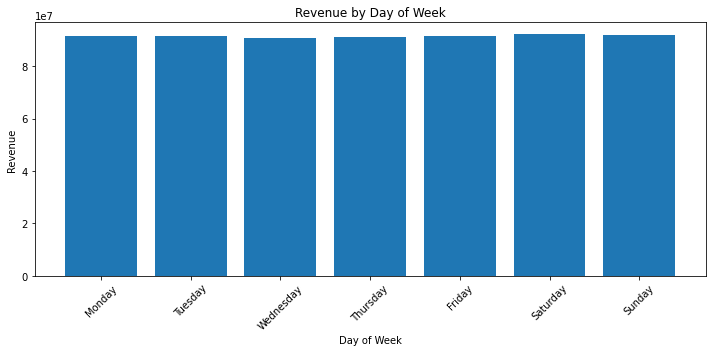

In [109]:
# Ensured Total Revenue Column is Numeric
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

# Grouped by 'day_of_week' and Calculate Sum of 'Total Revenue'
dow_summary = df.groupby('day_of_week')['Total Revenue'].sum().reset_index()

# Reordered days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_summary['day_of_week'] = pd.Categorical(dow_summary['day_of_week'], categories = days, ordered=True)
dow_summary = dow_summary.sort_values('day_of_week')

# Plotted Data
plt.figure(figsize=(10,5))
plt.bar(dow_summary['day_of_week'], dow_summary['Total Revenue'])
plt.title('Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Customer & Product Behaviour Analysis
Goal: Understand customer engagement, loyalty, and product perormance to support segmentation and targeting.

#### 1. Top Customers by Total Revenue

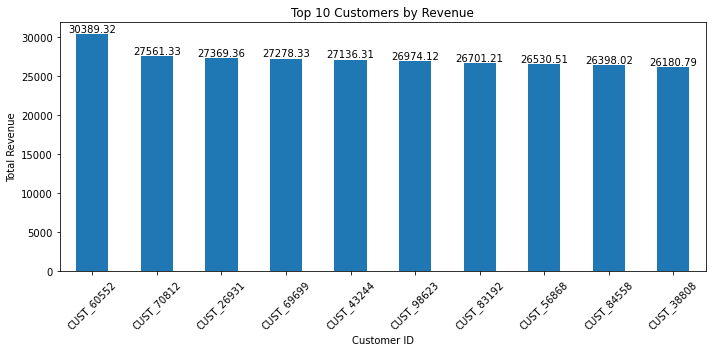

In [105]:
top_customers = df.groupby('Customer ID')['Total Revenue'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', title='Top 10 Customers by Revenue', figsize=(10,5))
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
for i, v in enumerate(top_customers):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### 2. One-Time vs Repeat Customers

In [59]:
order_counts = df.groupby('Customer ID').size()
repeat_customers = (order_counts > 1).sum()
one_time_customers = (order_counts == 1).sum()

print(f"Repeat Customers:{repeat_customers}")
print(f"One-Time Customers:{one_time_customers}")

Repeat Customers:95101
One-Time Customers:3247


#### 3. Product Popularity by Quantity and Revenue

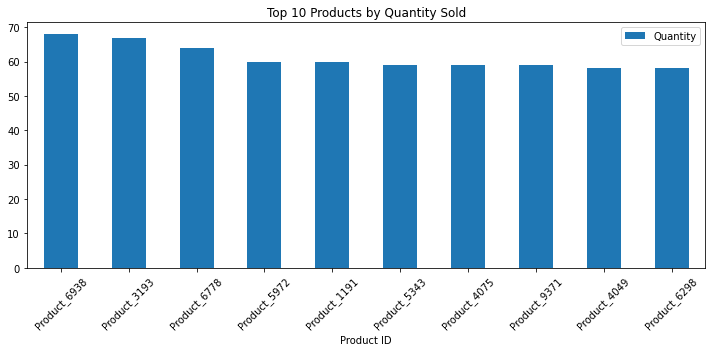

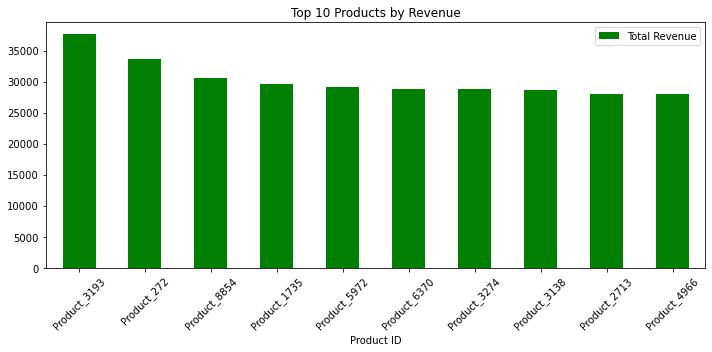

In [104]:
product_summary = df.groupby(['Product ID', 'Category']).agg({'Quantity': 'sum', 'Total Revenue': 'sum'}).reset_index()

top_products_by_quantity = product_summary.sort_values(by='Quantity', ascending=False).head(10)
top_products_by_revenue = product_summary.sort_values(by='Total Revenue', ascending=False).head(10)

# Plot by Quantity
top_products_by_quantity.plot(x='Product ID', y='Quantity', kind='bar', figsize=(10,5), 
                             title='Top 10 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot by Revenue
top_products_by_revenue.plot(x='Product ID', y='Total Revenue', kind='bar', figsize=(10,5), color='green', 
                             title='Top 10 Products by Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4. Revenue by Category

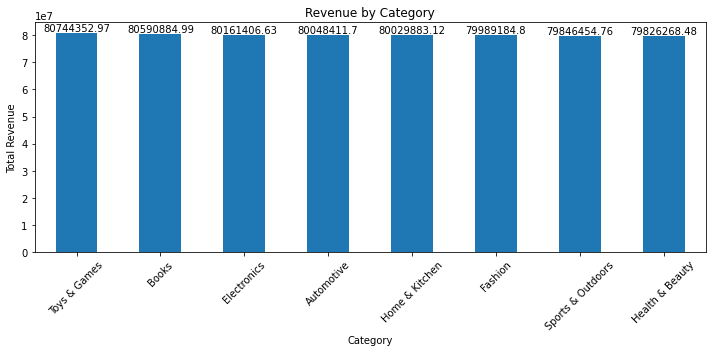

In [75]:
category_revenue = df.groupby('Category')['Total Revenue'].sum().sort_values(ascending=False)

category_revenue.plot(kind='bar', title='Revenue by Category', figsize=(10,5))
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
for i, v in enumerate(category_revenue):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Discount, Region & Payment Method Analysis

#### 1. Impact of Discount on Revenue and Quantity

In [91]:
correlation = df[['Discount (%)', 'Total Revenue', 'Quantity']].corr()
print(correlation)

               Discount (%)  Total Revenue  Quantity
Discount (%)       1.000000      -0.126697 -0.000752
Total Revenue     -0.126697       1.000000  0.589763
Quantity          -0.000752       0.589763  1.000000


#### Scatter Plot: Discount vs Revenue

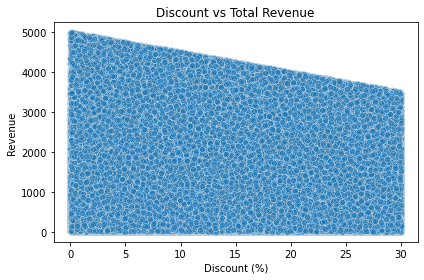

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Discount (%)', y='Total Revenue', data=df, alpha=0.5)
plt.title('Discount vs Total Revenue')
plt.xlabel('Discount (%)')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

#### Scatter Plot: Discount vs Quantity

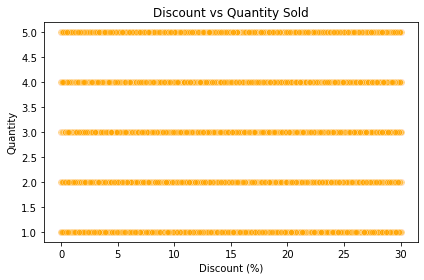

In [97]:
sns.scatterplot(x='Discount (%)', y='Quantity', data=df, alpha=0.5, color='orange')
plt.title('Discount vs Quantity Sold')
plt.xlabel('Discount (%)')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

#### 2. Revenue Distribution by Region

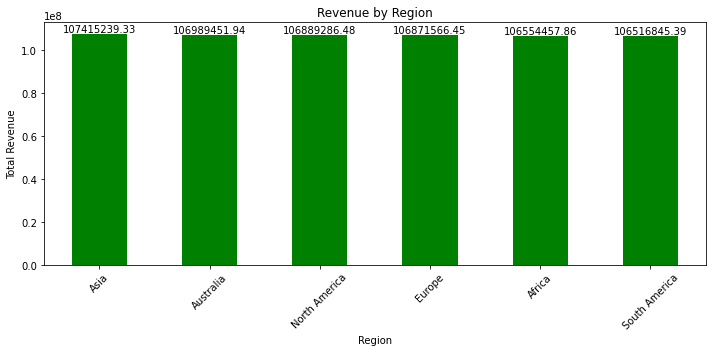

In [112]:
region_revenue = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

region_revenue.plot(kind='bar', title='Revenue by Region', figsize=(10,5), color='green')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
for i, v in enumerate(region_revenue):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### Average Revenue per Orer by Region

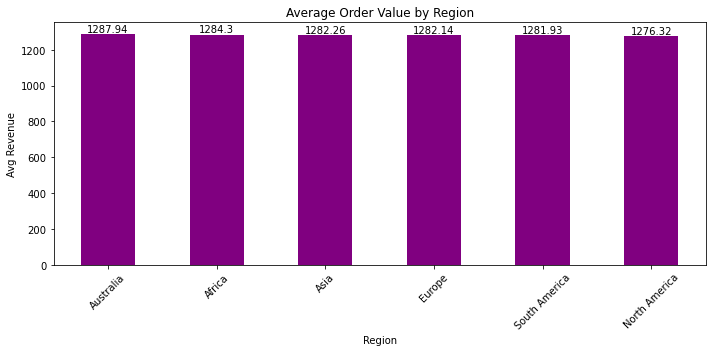

In [114]:
avg_revenue_region = df.groupby('Region')['Total Revenue'].mean().sort_values(ascending=False)

avg_revenue_region.plot(kind='bar', title='Average Order Value by Region', figsize=(10,5), color='purple')
plt.ylabel('Avg Revenue')
plt.xlabel('Region')
plt.xticks(rotation=45)
for i, v in enumerate(avg_revenue_region):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### 3. Payment Method Analysis

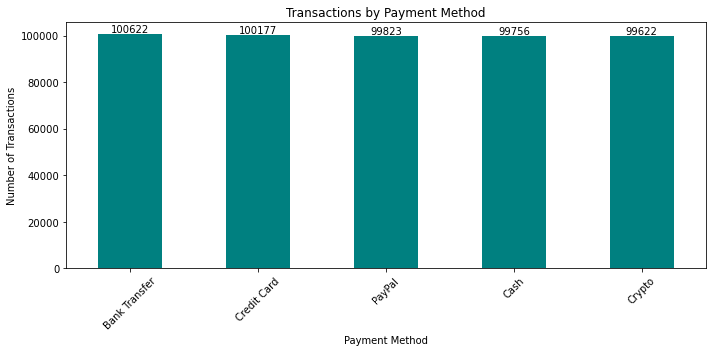

In [113]:
payment_summary = df['Payment Method'].value_counts()

payment_summary.plot(kind='bar', title='Transactions by Payment Method', figsize=(10,5), color='teal')
plt.ylabel('Number of Transactions')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
for i, v in enumerate(payment_summary):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### Revenue by Payment Method

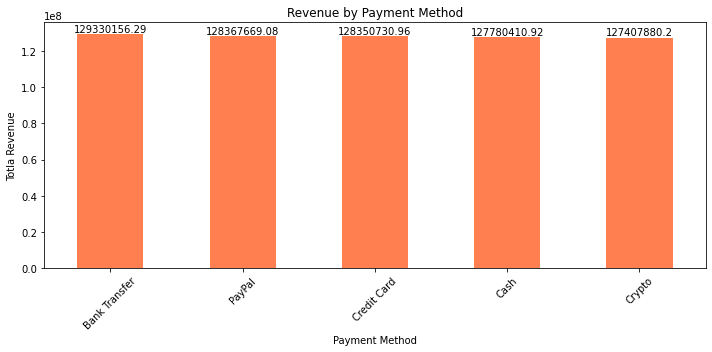

In [115]:
revenue_by_payment = df.groupby('Payment Method')['Total Revenue'].sum().sort_values(ascending=False)

revenue_by_payment.plot(kind='bar', title='Revenue by Payment Method', figsize=(10,5), color='coral')
plt.ylabel('Totla Revenue')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
for i, v in enumerate(revenue_by_payment):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [3]:
df.to_csv('Global_E-Commerce_Final.csv', index=False)